In [9]:
# Import standard libraries
from importlib import reload
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import sparse
import scipy.stats as ss
import csv
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import pickle
from collections import defaultdict
import operator
from scipy.sparse import csr_matrix
import itertools
import os.path
import math
import pybedtools
# Import custom libraries
import process_hic_contacts_intra as phc

In [10]:
# Reload modules in case of modifications
reload(phc)

<module 'new_process_hic_contacts_intra' from '/home/louiscam/projects/gpcr/code/processing_hic/IMR90_hic_preprocessing/new_process_hic_contacts_intra.py'>

In [11]:
# Specify directories and relevant information
genome_dir = '/home/louiscam/projects/gpcr/data/genome_data/'
processed_hic_dir = '/home/louiscam/projects/gpcr/save/processed_hic_data/'
saving_dir = '/home/louiscam/projects/gpcr/save/figures/'
cell_type = 'IMR90'
resol = 250000
quality = 'MAPQGE30'
norm = 'KR'
chr0 = 10

In [12]:
# Load raw HiC data
normalized_hic_data = phc.get_normed_hic_sparse(processed_hic_dir, cell_type, resol, quality, chr0, norm)
normalized_hic_data.head()

,locus_chr1,locus_chr2,norm_value
0,0,0,41753.8440
1,0,1,10476.9230
2,1,1,36544.9140
3,0,2,3680.9497
4,1,2,9331.2830


In [13]:
# Get chromosome sizes
df_sizes = phc.get_chrom_sizes(genome_dir,resol)
chr0_size = int(df_sizes[df_sizes['chr']==str(chr0)]['size_loci'])
print(chr0_size)
df_sizes.head()

543


,chr,size,size_loci,size_roundup
0,1,249250621,998,249500000
1,2,243199373,973,243250000
2,3,198022430,793,198250000
3,4,191154276,765,191250000
4,5,180915260,724,181000000


In [14]:
# Get dense HiC dataframe
df = phc.get_dense_hic_dataframe(normalized_hic_data, chr0_size, resol)
df.head()

,0,250000,500000,750000,1000000,1250000,1500000,1750000,2000000,2250000,...,133250000,133500000,133750000,134000000,134250000,134500000,134750000,135000000,135250000,135500000
0,41753.844,10476.923,3680.9497,3842.1384,1433.6487,296.51773,224.70728,197.00160,217.774370,170.54974,...,8.052756,21.782417,27.586906,38.776073,27.135021,41.924660,31.162820,81.134550,165.657260,0.0
250000,0.000,36544.914,9331.2830,7471.4000,2177.8418,199.30930,149.65169,136.94499,97.426056,86.72230,...,1.347630,10.935869,19.390020,36.154003,30.879131,39.880966,20.115390,66.757890,53.465320,0.0
500000,0.000,0.000,40756.7300,12952.9100,2343.3523,174.40082,124.99104,104.89715,104.477000,90.49705,...,0.000000,3.664788,22.278557,17.707703,25.565897,38.980560,29.210981,38.676430,28.368746,0.0
750000,0.000,0.000,0.0000,34210.8700,7018.6104,340.98648,246.43277,166.35165,156.729400,147.58318,...,4.181014,6.283052,18.142720,31.637016,29.116398,29.786972,19.646930,46.805878,39.933083,0.0
1000000,0.000,0.000,0.0000,0.0000,29059.0330,3422.10100,1863.63800,1157.22630,1009.812700,934.11920,...,7.167194,5.169867,40.267200,20.707119,35.743450,23.566864,15.452827,58.973280,52.130540,0.0


In [15]:
# Symmetrize
df = df+df.transpose()
df.values[[np.arange(df.shape[0])]*2] = df.values[[np.arange(df.shape[0])]*2]/2
df.head()

,0,250000,500000,750000,1000000,1250000,1500000,1750000,2000000,2250000,...,133250000,133500000,133750000,134000000,134250000,134500000,134750000,135000000,135250000,135500000
0,41753.8440,10476.9230,3680.9497,3842.1384,1433.6487,296.51773,224.70728,197.00160,217.774370,170.54974,...,8.052756,21.782417,27.586906,38.776073,27.135021,41.924660,31.162820,81.134550,165.657260,0.0
250000,10476.9230,36544.9140,9331.2830,7471.4000,2177.8418,199.30930,149.65169,136.94499,97.426056,86.72230,...,1.347630,10.935869,19.390020,36.154003,30.879131,39.880966,20.115390,66.757890,53.465320,0.0
500000,3680.9497,9331.2830,40756.7300,12952.9100,2343.3523,174.40082,124.99104,104.89715,104.477000,90.49705,...,0.000000,3.664788,22.278557,17.707703,25.565897,38.980560,29.210981,38.676430,28.368746,0.0
750000,3842.1384,7471.4000,12952.9100,34210.8700,7018.6104,340.98648,246.43277,166.35165,156.729400,147.58318,...,4.181014,6.283052,18.142720,31.637016,29.116398,29.786972,19.646930,46.805878,39.933083,0.0
1000000,1433.6487,2177.8418,2343.3523,7018.6104,29059.0330,3422.10100,1863.63800,1157.22630,1009.812700,934.11920,...,7.167194,5.169867,40.267200,20.707119,35.743450,23.566864,15.452827,58.973280,52.130540,0.0


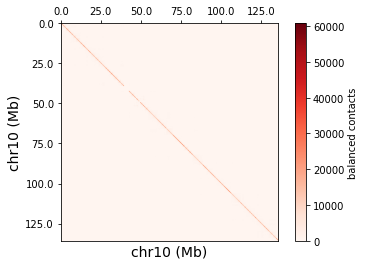

In [16]:
# Plot HiC dense dataframe
%matplotlib inline
plotname = ''
hic_plots_dir = ''
phc.plot_dense_hic_dataframe(df, chr0, '', hic_plots_dir, show=True)

In [17]:
# Get centromere locations
df_centrom = phc.get_centromere_locations(genome_dir)
df_centrom.head()

,bin,chrom,chromStart,chromEnd,ix,n,size,type,bridge
0,23,chr1,121535434,124535434,1270,N,3000000,centromere,no
1,20,chr2,92326171,95326171,770,N,3000000,centromere,no
2,2,chr3,90504854,93504854,784,N,3000000,centromere,no
3,1,chr4,49660117,52660117,447,N,3000000,centromere,no
4,14,chr5,46405641,49405641,452,N,3000000,centromere,no


In [18]:
# Filter out centromeres
filter_size = 2000000
df = phc.filter_centromeres(df, chr0, 'row', df_centrom, filter_size, resol)
df = phc.filter_centromeres(df, chr0, 'col', df_centrom, filter_size, resol)

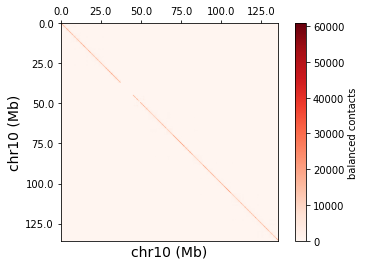

In [19]:
# Plot HiC data after filtering out centromeres
plotname = ''
hic_plots_dir = ''
phc.plot_dense_hic_dataframe(df, chr0, '', hic_plots_dir, show=True)

In [20]:
# Load repeats data
df_repeats = phc.load_repeats_data(genome_dir)
df_repeats.head()

,genoname,genoStart,genoEnd,repLength
0,chr1,10000,10468,468
1,chr1,10468,11447,979
2,chr1,11503,11675,172
3,chr1,11677,11780,103
4,chr1,15264,15355,91


In [21]:
# Find repeat-covered loci to filter out
chr_list = [chr0] # np.arange(1,22+1)
dic_repeats_tofilter = phc.find_repeat_locations(df_repeats, chr_list, df_sizes, resol)

In [22]:
# Filter repeats for chr0
df = phc.filter_repeats(df, chr0, dic_repeats_tofilter, 'row')
df = phc.filter_repeats(df, chr0, dic_repeats_tofilter, 'col')

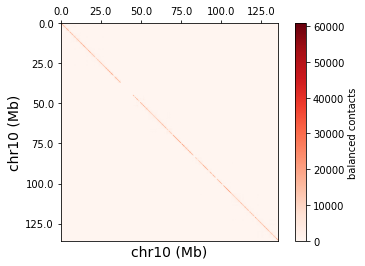

In [23]:
# Plot HiC data after filtering out repeats
plotname = ''
hic_plots_dir = ''
phc.plot_dense_hic_dataframe(df, chr0, plotname, hic_plots_dir, show=True)

In [24]:
# Log-transform dataframe
df_transformed = phc.log_transform(df)

In [25]:
# Filter out outliers
df_transformed = phc.filter_outliers(df_transformed)

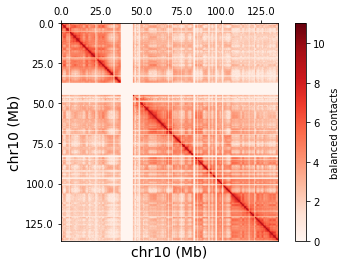

In [26]:
# Plot HiC data after filtering out centromeres, repeats and outliers
plotname = ''
hic_plots_dir = ''
phc.plot_dense_hic_dataframe(df_transformed, chr0, plotname, hic_plots_dir, show=True)